In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msnbehdani/mock-dataset-of-second-hand-car-sales")


import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

csv_path = os.path.join(path, os.listdir(path)[0])
df = pd.read_csv(csv_path)


sns.set_theme(style='ticks')

df.head()

c:\Users\RAZER\.conda\envs\df_projects\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [3]:
df.isna().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [4]:
print('The duplicated values in the data set are: ', df.duplicated().sum())
df = df.drop_duplicates()
df.duplicated().sum()

The duplicated values in the data set are:  12


0

In [5]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,49988.000000,49988.000000,49988.000000,49988.000000
mean,1.773140,2004.209630,112515.561215,13829.112387
std,0.734149,9.646056,71624.341062,16417.812203
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54375.250000,3059.750000
50%,1.600000,2004.000000,101011.500000,7971.000000
75%,2.000000,2012.000000,158617.250000,19028.500000
max,5.000000,2022.000000,453537.000000,168081.000000


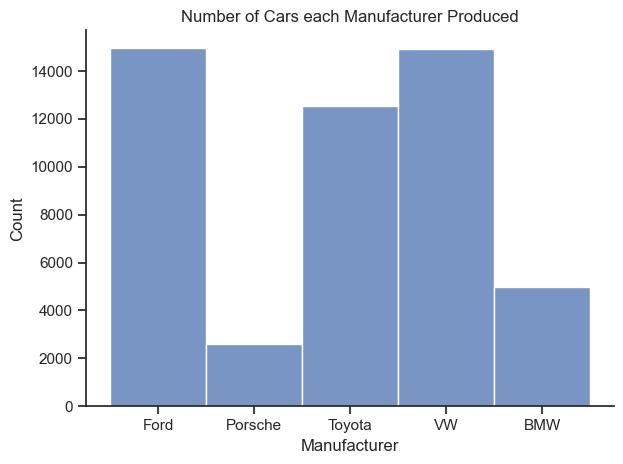

In [6]:
sns.histplot(df['Manufacturer'])
plt.title('Number of Cars each Manufacturer Produced')
plt.xlabel('Manufacturer')
plt.tight_layout()
sns.despine()
plt.show()

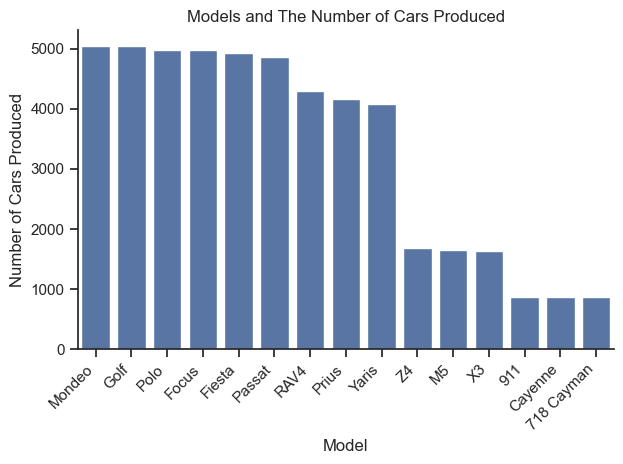

In [7]:
df_model=df['Model'].value_counts().to_frame()
sns.barplot(df_model, x='Model', y='count')
plt.title('Models and The Number of Cars Produced')
plt.xlabel('Model')
plt.ylabel('Number of Cars Produced')
plt.xticks(rotation=45, ha='right', va='top')
plt.tight_layout()
sns.despine()
plt.show()

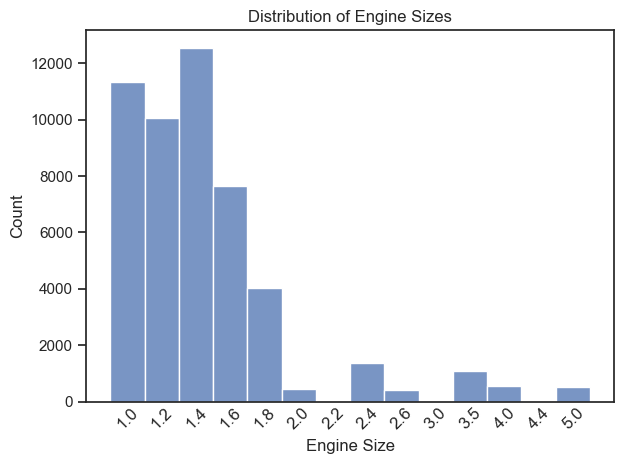

In [8]:
from adjustText import adjust_text

df_eng_size = df['Engine size'].value_counts().sort_index()

ax = sns.histplot(df['Engine size'], bins=len(df_eng_size))

plt.xticks([])

# Positions for bars
bar_positions = [patch.get_x() + patch.get_width() / 2 for patch in ax.patches]

# Place labels slightly below x-axis
texts = []
for pos, label in zip(bar_positions, df_eng_size.index):
    texts.append(
        plt.text(pos, -0.009 * ax.get_ylim()[1], str(label), ha='center', va='top', rotation=45)
    )
plt.title('Distribution of Engine Sizes')
plt.xlabel('Engine Size',labelpad=27)
# Adjust text to prevent overlap
#adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.tight_layout()
plt.show()



In [9]:
df['Fuel type'].value_counts()

Fuel type
Petrol    25480
Diesel    13264
Hybrid    11244
Name: count, dtype: int64

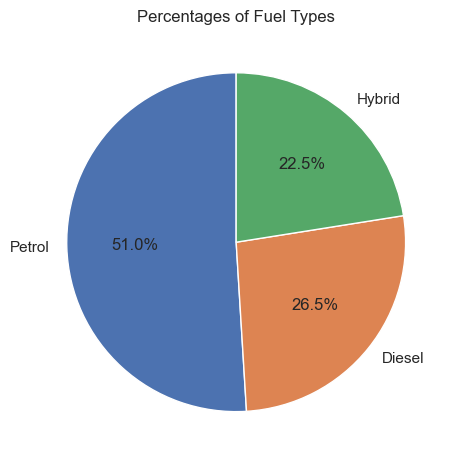

In [10]:
plt.pie(df['Fuel type'].value_counts(), labels=['Petrol','Diesel','Hybrid'],autopct='%1.1f%%',startangle=90)
plt.title('Percentages of Fuel Types')
plt.tight_layout()
plt.show()

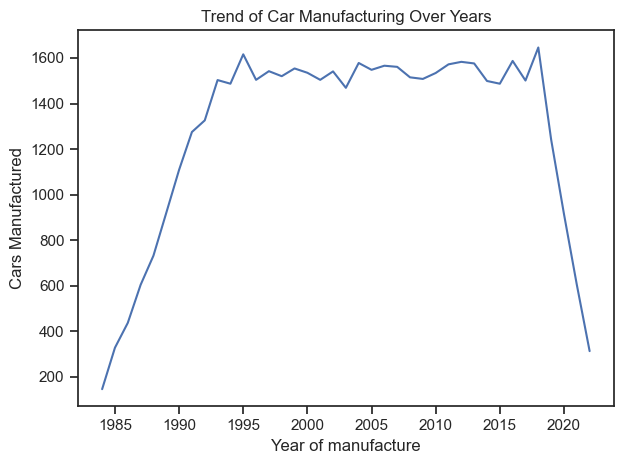

In [11]:
df_plot=df['Year of manufacture'].value_counts().to_frame().sort_values(by='Year of manufacture')
sns.lineplot(df_plot,x='Year of manufacture',y='count')
plt.title('Trend of Car Manufacturing Over Years')
plt.ylabel('Cars Manufactured')
plt.tight_layout()
plt.show()

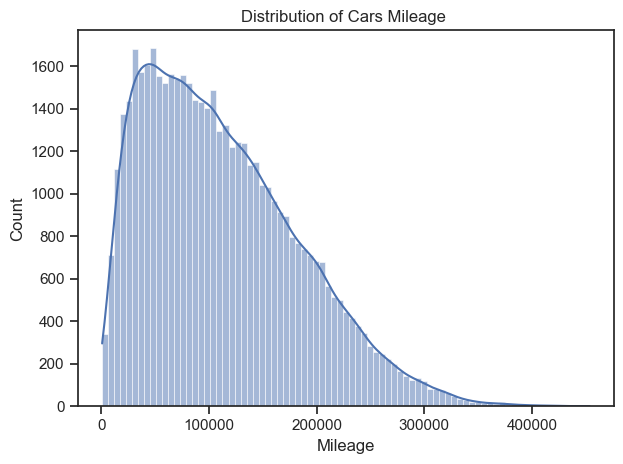

In [12]:
sns.histplot(df['Mileage'],kde=True)
plt.title('Distribution of Cars Mileage ')
plt.tight_layout()
plt.show()

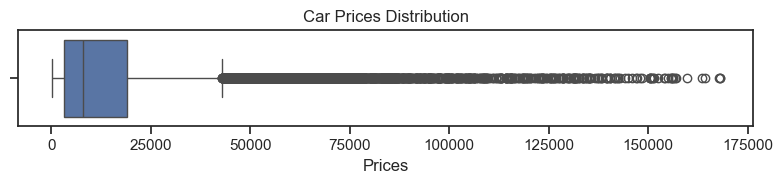

In [13]:
plt.figure(figsize=(8,2))

sns.boxplot(data=df,x='Price',orient='h')
plt.title('Car Prices Distribution')
plt.xlabel('Prices')
plt.tight_layout()


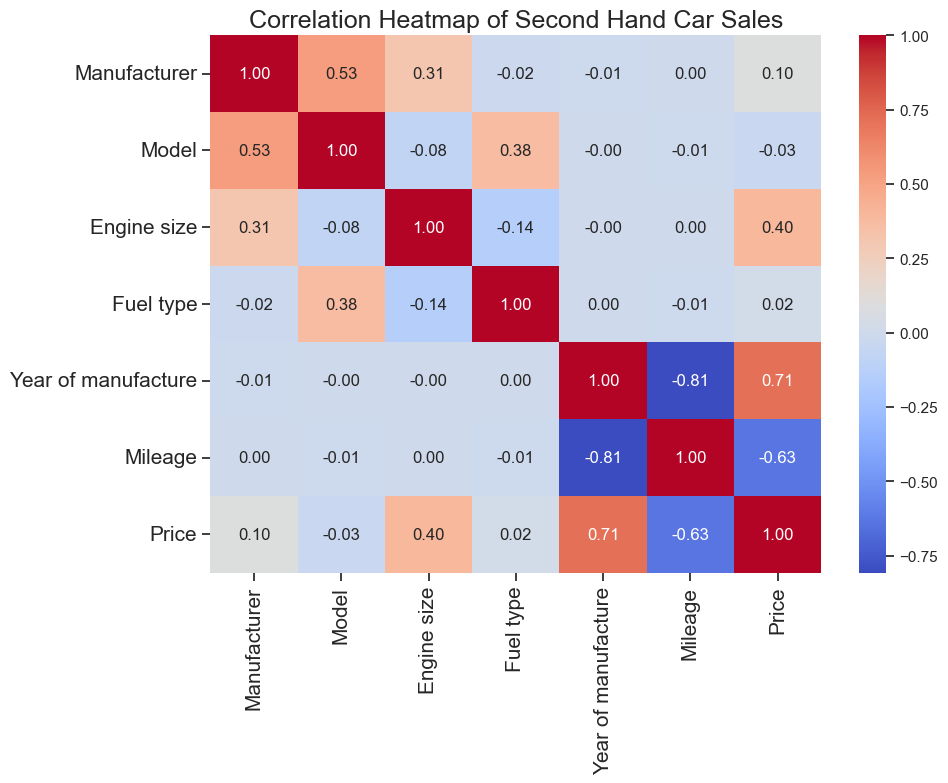

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_encoded = df.copy() 
manufac_map= {'Ford':1, 'Porsche':2, 'Toyota':3, 'VW':4, 'BMW':5}
df_encoded['Manufacturer']=df_encoded['Manufacturer'].map(manufac_map)
df_encoded['Model']=encoder.fit_transform(df_encoded['Model'])
fuel_map={'Petrol':1, 'Diesel':2, 'Hybrid':3}
df_encoded['Fuel type']=df_encoded['Fuel type'].map(fuel_map)

corr_data=df_encoded[df_encoded.columns]
corr_matrix = corr_data.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Correlation Heatmap of Second Hand Car Sales',fontsize=18)
plt.tight_layout()
plt.show()

There is a correlation between :
- Model and manufacturer 
- Engine size and manufacturer
- Fuel type and model
- Engine size and price -
- Mileage and Year ofManufacture (no need)
- Mileage and Price -
- Year of manufacture and Price -